## Testing how LDSim data can best be explored via Jupyter notebook

Credits - this was kicked off from Tim Welch's initial exploratory work for VPDC work: https://github.com/twelch/cloud-stac-books/blob/main/water_project.ipynb

In [1]:
!pip install --upgrade geopandas
!pip install --upgrade rasterio
!pip install --upgrade leafmap

In [2]:
import geopandas
import leafmap
import fiona
import rasterio
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
url = "https://storage.googleapis.com/way-find.com/vpdc/yuba_gpu_prj.fgb"

Confirm that flatgeobuf is supported

In [4]:
fiona.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [5]:
gpu = geopandas.read_file(url)

Plot the hosted Yuba gpu FlatGeobuf data 

<AxesSubplot: >

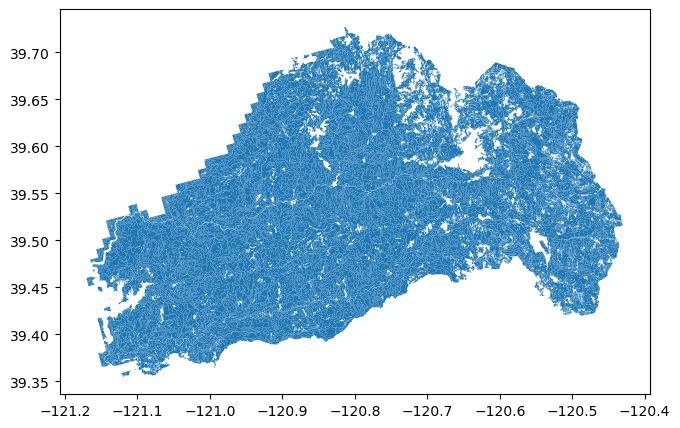

In [6]:
gpu.plot(figsize=(10, 5))

Examine the Yuba gpu tabular data

In [7]:
gpu.head()

,id,areaHa,areaAcres,elevWestCL,slopeCL,aspectCL,sriCL,tpiCL,twiCL,hliCL,...,treeQmdDSN,treeQmdDSA,stageDSN,stageDSA,sizeDSN,sizeDSA,CompDSN,CompDSA,lyr1,geometry
0,6080.0,29.280001,72.352346,upper montane,mixed,mixed,mixed,mixed,mixed,mixed,...,0.0,3.0,0.00,0.0,0.0,1.6,6.10,14.10,1.0,"MULTIPOLYGON (((-120.47601 39.42658, -120.4760..."
1,6206.0,7.882500,19.478052,upper montane,steep,flat,low,mixed,mixed,mixed,...,0.0,0.0,0.25,0.5,0.0,0.0,6.35,7.60,1.0,"MULTIPOLYGON (((-120.46392 39.44516, -120.4639..."
2,6039.0,31.935000,78.912981,upper montane,mixed,mixed,mixed,mixed,mesic,mixed,...,0.0,0.0,0.00,0.0,1.2,1.2,11.25,11.25,1.0,"MULTIPOLYGON (((-120.47233 39.45089, -120.4723..."
3,6076.0,20.194999,49.902853,mixed,gentle,mixed,mixed,mixed,mixed,moderate,...,0.0,0.0,0.00,0.0,0.4,0.4,8.60,8.60,1.0,"MULTIPOLYGON (((-120.47655 39.44800, -120.4765..."
4,6037.0,37.675000,93.096808,upper montane,mixed,flat,mixed,mixed,mesic,mixed,...,0.0,0.0,0.00,0.0,0.0,0.0,15.45,15.45,1.0,"MULTIPOLYGON (((-120.47636 39.44525, -120.4763..."


Plot composite FRID (Fire Return Interval Departure) estimates with an accurate legend

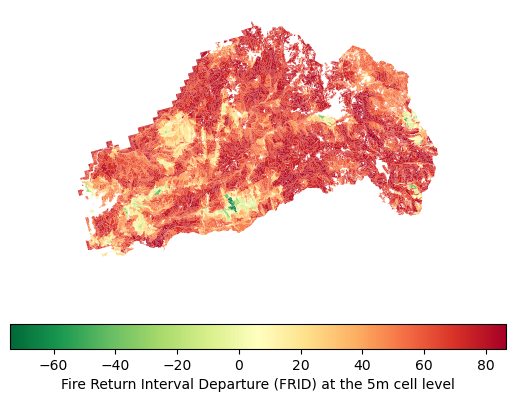

In [8]:
fig, ax = plt.subplots(1, 1)

gpu.plot(
    figsize=(10, 5),
    column='FRID', 
    ax=ax, 
    cmap='RdYlGn_r', 
    legend=True,
    legend_kwds={'label': "Fire Return Interval Departure (FRID) at the 5m cell level",
                        'orientation': "horizontal"})

ax.set_axis_off();

Save the FlatGeobuf file as a GeoPackage to local system 

In [9]:
gpu.to_file("yuba_gpu.gpkg")## Save the FlatGeobuf file as a GeoPackage to local system 

In [10]:
m = leafmap.Map(center=[39.566217, -120.905844], zoom=10)

in_geojson = 'https://storage.googleapis.com/way-find.com/vpdc/yuba_gpu.geojson'
m.add_geojson(in_geojson, layer_name="gpu")

m

Map(center=[39.566217, -120.905844], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…